In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from google.colab import files
from tqdm import tqdm

%matplotlib inline

In [ ]:
#Connecting with Google Drive
from google.colab import drive
drive.mount('/content/drive')
pth = "/content/drive/MyDrive/Tesis Anlly/Data/OBA_age_stars.csv"

Mounted at /content/drive


In [ ]:
df = pd.read_csv(pth)
df2 = df.copy()
xini=df2['x']
yini=df2['y']
zini=df2['z']
ang = np.pi / 180

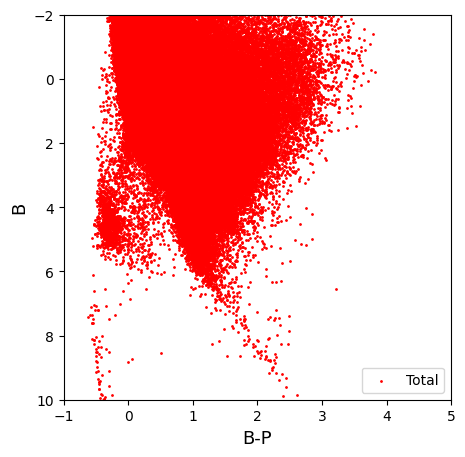

In [ ]:
plt.figure(figsize=(5,5))

# plt.scatter(df['bp_rp'],df['M_g'],s=0.0001)
# plt.scatter(1,2,c='r',label="OBA")
# plt.scatter(1,2,c='b',label="Muestra Total")

plt.scatter(df2['bp_rp'],df2['M_g'],s=1,c='red',label="Total")
#
# plt.scatter(df2['bp_rp'],df2['M_g']+1,s=1,c='b',label="OBA")
#plt.plot(np.arange(-0.25,2.5,0.1),pend*np.arange(-0.25,2.5,0.1)-interc,c='r')
plt.ylim(10,-2)
plt.xlim(-1,5)
plt.legend()
plt.xlabel("B-P", fontsize= 13)
plt.ylabel("B", fontsize= 13)
plt.show()

In [ ]:
df.columns

Index(['source_id', 'ra', 'dec', 'parallax', 'pm', 'pmra', 'pmdec', 'ruwe',
       'phot_g_n_obs', 'phot_g_mean_mag', 'phot_g_mean_flux_error',
       'phot_bp_mean_mag', 'phot_bp_mean_flux_error', 'phot_rp_mean_mag',
       'phot_rp_mean_flux_error', 'bp_rp', 'l', 'b', 'radial_velocity',
       'radial_velocity_error', 'r_med_geo', 'r_lo_geo', 'r_hi_geo',
       'r_med_photogeo', 'r_lo_photogeo', 'r_hi_photogeo', 'teff_gspphot',
       'teff_gspspec', 'teff_esphs', 'teff_espucd', 'mh_gspphot', 'mh_gspspec',
       'alphafe_gspspec', 'fem_gspspec', 'cafe_gspspec', 'tife_gspspec',
       'mgfe_gspspec', 'sfe_gspspec', 'nfe_gspspec', 'nife_gspspec',
       'distance_gspphot', 'ag_gspphot', 'abp_gspphot', 'arp_gspphot',
       'ebpminrp_gspphot', 'mg_gspphot', 'radius_gspphot', 'mass_flame',
       'age_flame', 'flags_flame', 'spectraltype_esphs', 'x', 'y', 'z',
       'distancia', 'M_g', 'M_bp', 'M_rp'],
      dtype='object')

In [ ]:
# df.info()
##No hay valores nulos o faltantes en las 3 columnas usadas
df[['l','b','spectraltype_esphs','r_med_geo','distance_gspphot']].isnull().sum()

l                          0
b                          0
spectraltype_esphs         0
r_med_geo                  0
distance_gspphot      243852
dtype: int64

In [ ]:
A=(df['spectraltype_esphs'] == 'A').sum()
B=(df['spectraltype_esphs'] == 'B').sum()
O=(df['spectraltype_esphs'] == 'O').sum()

In [ ]:
print(O,B,A)

14794 506618 140716


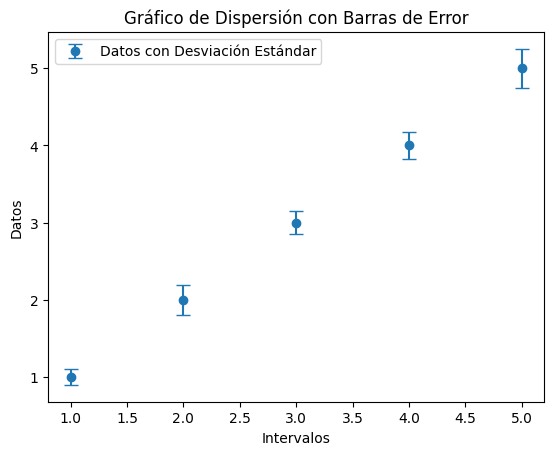

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tienes tus datos y desviaciones estándar
intervalos = np.array([1, 2, 3, 4, 5])
desviaciones = np.array([0.1, 0.2, 0.15, 0.18, 0.25])

# Crear un gráfico de dispersión con barras de error
plt.errorbar(intervalos, intervalos, yerr=desviaciones, fmt='o', capsize=5, label='Datos con Desviación Estándar')

plt.xlabel("Intervalos")
plt.ylabel("Datos")
plt.title("Gráfico de Dispersión con Barras de Error")
plt.legend()
plt.show()


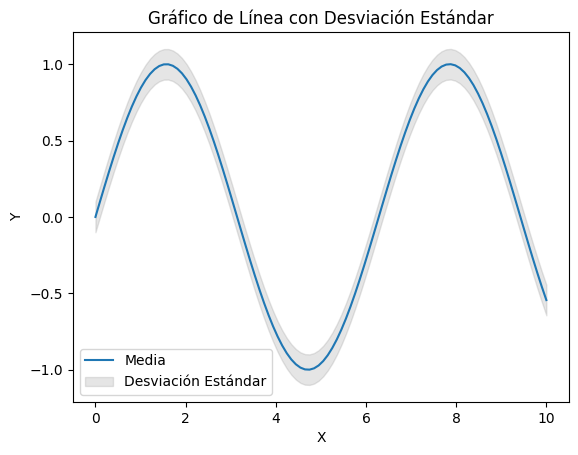

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)
std_dev = 0.1  # Ejemplo de desviación estándar

plt.plot(x, y, label='Media')
plt.fill_between(x, y - std_dev, y + std_dev, alpha=0.2, color='gray', label='Desviación Estándar')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Gráfico de Línea con Desviación Estándar")
plt.show()


In [ ]:
np.arange(0, 20, 1)[:-1],np.arange(0, 20, 1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]))

In [ ]:
import numpy as np

# Genera un conjunto de puntos (x, y)

x = np.array(df['r_med_geo']/1000) # Valores de x entre 0 y 10
y = np.array(df['distance_gspphot']/1000) # Añadiendo un poco de ruido

# Definir los intervalos de 2 unidades en el eje x
intervalos_x = np.arange(0, 10, 0.5)
a=intervalos_x[:-1]

# Inicializar una lista para almacenar las desviaciones estándar
desviaciones_estandar = []

# Iterar sobre los intervalos y calcular la desviación estándar en cada uno
for i in range(len(intervalos_x)-1):

    # Seleccionar los puntos dentro del intervalo
  indices = np.where((x >= intervalos_x[i]) & (x < intervalos_x[i+1]))
  # print(indices)
  datos_intervalo = y[indices]
  # print(datos_intervalo)

  # Calcular la desviación estándar
  desviacion_std = np.std(datos_intervalo)

  desviaciones_estandar.append(desviacion_std)

print("Desviaciones Estándar por Intervalo de 2 Unidades en x:")
for i, desviacion_std in enumerate(desviaciones_estandar):
    print(f"Intervalo {i*2}-{(i+1)*2}: {desviacion_std}")


Desviaciones Estándar por Intervalo de 2 Unidades en x:
Intervalo 0-2: 0.10943270839688651
Intervalo 2-4: 0.1694990973506337
Intervalo 4-6: 0.254270114667647
Intervalo 6-8: 0.412195816520854
Intervalo 8-10: 0.6691387631355399
Intervalo 10-12: 0.9546782174851108
Intervalo 12-14: 1.262450409676729
Intervalo 14-16: 1.5407650353195268
Intervalo 16-18: 1.7323262184900963
Intervalo 18-20: 1.8882800364091634
Intervalo 20-22: 1.994992881546511
Intervalo 22-24: 2.1336555108252795
Intervalo 24-26: 2.103266762109094
Intervalo 26-28: 2.073673361661935
Intervalo 28-30: 2.1897922482954386
Intervalo 30-32: 2.404290476129166
Intervalo 32-34: 2.2808596849529237
Intervalo 34-36: 2.153619737462458
Intervalo 36-38: 2.5689356729991584


(0.0, 10.0)

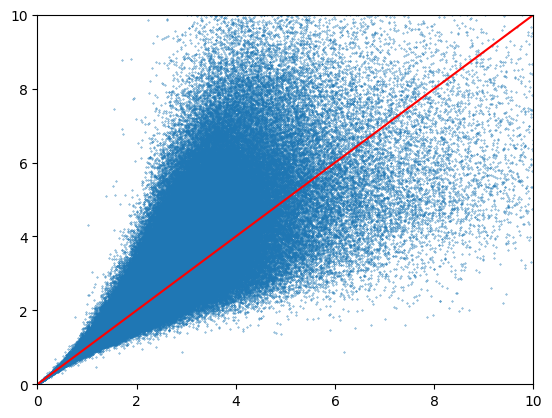

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.linear_model import LinearRegression


df= df[df['distance_gspphot'].notna()]

x = df['r_med_geo']/1000
y = df['distance_gspphot']/1000
X_train=np.array(x)
y_train=y

modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

a,b=modelo.intercept_,modelo.coef_.flatten()
x_fit = np.linspace(min(x), 10, 100)
plt.scatter(x, y, s=0.1)
plt.plot(x_fit,b*x_fit,color="red")
plt.xlim(0,10)
plt.ylim(0,10)

[0.051513216865086364, 0.2448638716535149, 0.669854107781811, 1.137584395909241, 1.394193287524291, 1.5347569267943086]


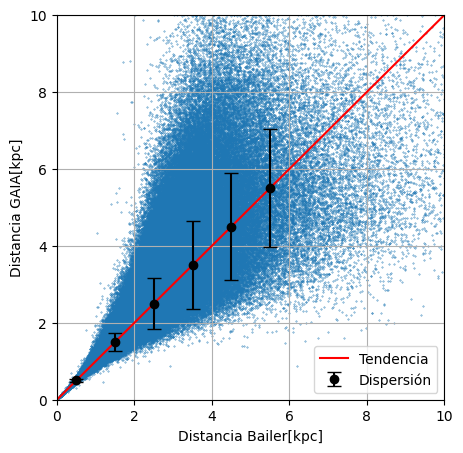

In [ ]:
def dispersion(xc,dx):
  cond=abs(x-xc)<dx
  yi=np.array(y[cond])
  xi=np.array(x[cond])
  yp=b*xi
  return np.mean(abs(yi-yp))

def plotdispercion(x0,xf,dx):
  dx=dx/2
  x = np.array(df['r_med_geo']/1000)
  y = np.array(df['distance_gspphot']/1000)
  dm=[]
  for xc in np.arange(x0,xf+dx,2*dx):
    dm.append(dispersion(xc,dx))
  xint=np.arange(x0,xf+dx,2*dx)
  plt.errorbar(xint, b*xint, yerr=dm, fmt='o', capsize=5,color="k" ,label='Dispersión')
  return dm

plt.figure(figsize=(5,5))
x_fit = np.linspace(min(x), 10, 100)
plt.scatter(x, y, s=0.1)
dm=plotdispercion(0.5,6,1)
print(dm)
plt.plot(x_fit,b*x_fit,color="red", label="Tendencia")
plt.grid()
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('Distancia Bailer[kpc]', fontsize=10)
plt.ylabel('Distancia GAIA[kpc]', fontsize=10)
plt.legend()

In [ ]:
dispersion(5,0.5)

1.4628361432487724

In [ ]:
cond=x<100
np.mean((y/x)[cond])

1.1448817409012035

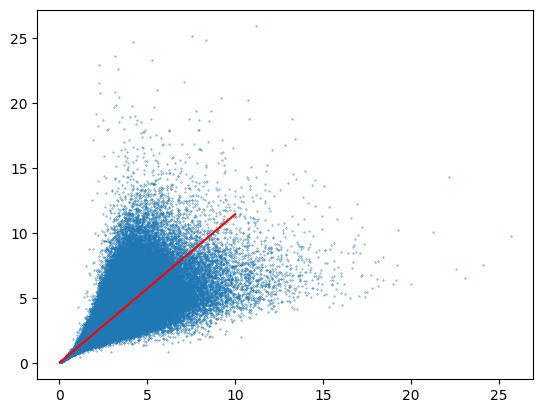

In [ ]:
m=np.mean((y/x)[cond])
x_fit = np.linspace(min(x), 10, 100)
plt.scatter(x, y, s=0.1)
plt.plot(x_fit,m*x_fit,color="red")

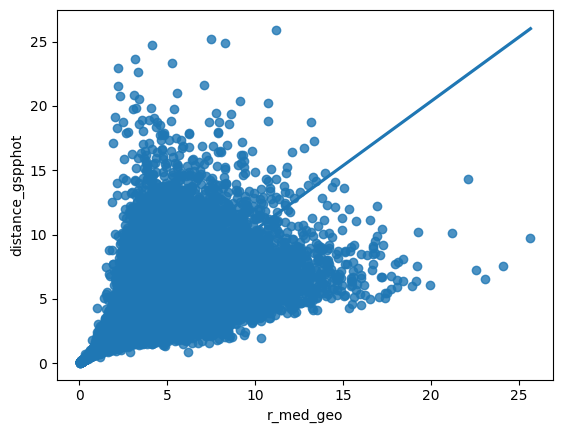

In [ ]:
import seaborn as sns
x=df[['r_med_geo','distance_gspphot']]/1000
sns.regplot(data=x, x='r_med_geo', y='distance_gspphot',s=0.1)
plt.show()

In [ ]:
import numpy as np

# Supongamos que 'x' e 'y' son tus datos
x = df['r_med_geo'] / 1000
y = df['distance_gspphot'] / 1000

# Definir los intervalos de 2 unidades en el eje 'x'
intervalos_x = np.arange(np.floor(min(x)), np.ceil(max(x)), 2)

# Inicializar una lista para almacenar las dispersiones por intervalo
dispersiones_por_intervalo = []

for i in range(len(intervalos_x)-1):
    # Filtrar los puntos que están dentro del intervalo
    mask = (x >= intervalos_x[i]) & (x < intervalos_x[i+1])
    x_intervalo = x[mask]
    y_intervalo = y[mask]

    if len(x_intervalo) > 0:
        # Calcular la mediana de 'x' e 'y' para el intervalo
        median_x = np.median(x_intervalo)
        median_y = np.median(y_intervalo)

        # Calcular la distancia vertical entre cada punto y la línea de tendencia
        vertical_distances = y_intervalo - median_y

        # Calcular la suma de los cuadrados de las distancias verticales
        sum_squares = np.sum(vertical_distances**2)

        # Calcular la dispersión (varianza) promedio para el intervalo
        dispersion = sum_squares / len(y_intervalo)

        # Agregar la dispersión a la lista
        dispersiones_por_intervalo.append(dispersion)

# Calcular la dispersión promedio por intervalo
dispersion_promedio_por_intervalo = np.mean(dispersiones_por_intervalo)

print(f"La dispersión promedio por intervalo de 2 unidades en el eje 'x' es: {dispersion_promedio_por_intervalo:.4f} kpc^2")


La dispersión promedio por intervalo de 2 unidades en el eje 'x' es: 0.0000 kpc^2


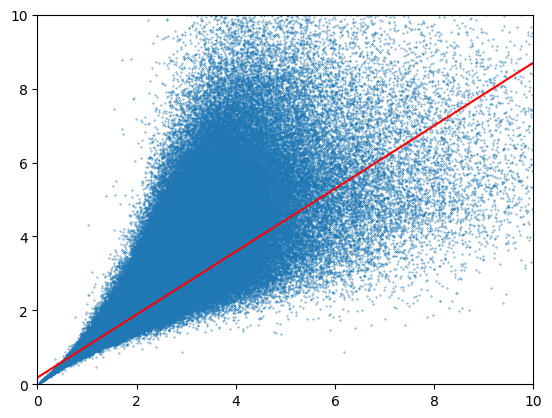

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
x = df['r_med_geo'] / 1000
y = df['distance_gspphot'] / 1000

# Ajuste de regresión lineal
n=len(x)
m=(n*np.sum(x*y)-np.sum(x)*np.sum(y))/(n*np.sum(x**2)-abs(np.sum(x))**2)
b=(np.sum(y)*np.sum(x**2)-np.sum(x)*np.sum(x*y))/(n*np.sum(x**2)-abs(np.sum(x))**2)
# Crear un rango de valores x para la línea de tendencia
x_fit = np.linspace(min(x), 10, 100)

# Calcular los valores y correspondientes
y_fit = m*x_fit+b

# Graficar los puntos y la línea de tendencia
plt.scatter(x, y, s=0.1)
plt.plot(x_fit, y_fit, color='red')
plt.xlim(0,10)
plt.ylim(0,10)
# Mostrar la gráfica
plt.show()


In [ ]:
x_fit, y_fit

(array([4.63570450e-03, 2.63801910e-01, 5.22968115e-01, 7.82134320e-01,
        1.04130052e+00, 1.30046673e+00, 1.55963293e+00, 1.81879914e+00,
        2.07796534e+00, 2.33713155e+00, 2.59629775e+00, 2.85546396e+00,
        3.11463016e+00, 3.37379637e+00, 3.63296257e+00, 3.89212878e+00,
        4.15129498e+00, 4.41046119e+00, 4.66962739e+00, 4.92879360e+00,
        5.18795980e+00, 5.44712601e+00, 5.70629221e+00, 5.96545842e+00,
        6.22462462e+00, 6.48379083e+00, 6.74295703e+00, 7.00212324e+00,
        7.26128944e+00, 7.52045565e+00, 7.77962185e+00, 8.03878806e+00,
        8.29795426e+00, 8.55712047e+00, 8.81628667e+00, 9.07545288e+00,
        9.33461908e+00, 9.59378529e+00, 9.85295149e+00, 1.01121177e+01,
        1.03712839e+01, 1.06304501e+01, 1.08896163e+01, 1.11487825e+01,
        1.14079487e+01, 1.16671149e+01, 1.19262811e+01, 1.21854473e+01,
        1.24446135e+01, 1.27037797e+01, 1.29629460e+01, 1.32221122e+01,
        1.34812784e+01, 1.37404446e+01, 1.39996108e+01, 1.425877

In [ ]:
sns.regplot(data=x, x='r_med_geo', y='distance_gspphot',scatter_kws={'s': 0.1})
plt.show()

NameError: ignored

(0.0, 10.0)

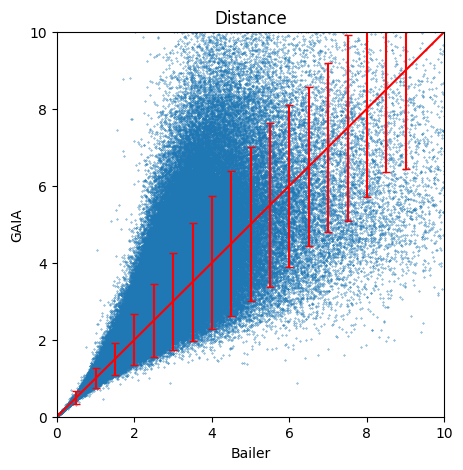

In [ ]:
df= df[df['distance_gspphot'].notna()]
plt.figure(figsize=(5,5))
x=np.arange(0,25,0.01)
plt.scatter(df['r_med_geo']/1000,df['distance_gspphot']/1000,s=0.1) ## dividiendo entre 1000 para pasar a kpc
# plt.scatter(df['r_med_geo'],df['r_med_photogeo'],s=0.1)
plt.plot(x,x,'r')
plt.errorbar(a ,a, yerr= desviaciones_estandar, linestyle="None", capsize=3, color="red")
plt.title('Distance')
plt.xlabel('Bailer')
plt.ylabel('GAIA')
# plt.xlabel('r_med_geo')
# plt.ylabel('r_med_photogeo')


plt.xlim(0,10)
plt.ylim(0,10)

In [ ]:
# Calcular las distancias de los puntos a la recta y = x
distancias = np.abs(df['r_med_geo']/1000 - df['distance_gspphot']/1000)
# df['r_med_geo']/1000,df['distance_gspphot']/1000,
# Calcular la desviación media
desviacion_media = np.mean(distancias)

print(f"La desviación media de los datos es: {desviacion_media}")

La desviación media de los datos es: 0.6360956336504271


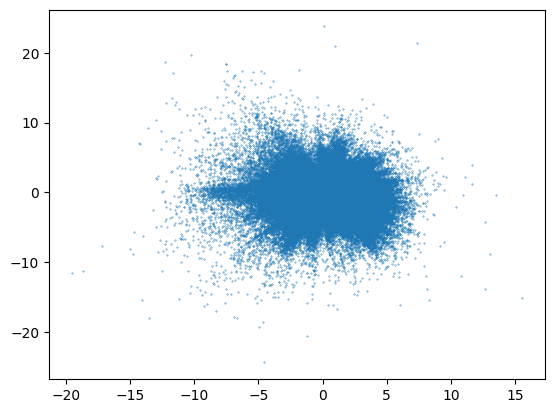

In [ ]:
plt.scatter(df2['x'],df2['y'],s=0.1)
# plt.ylim(-5,5)
# plt.xlim(-5,5)

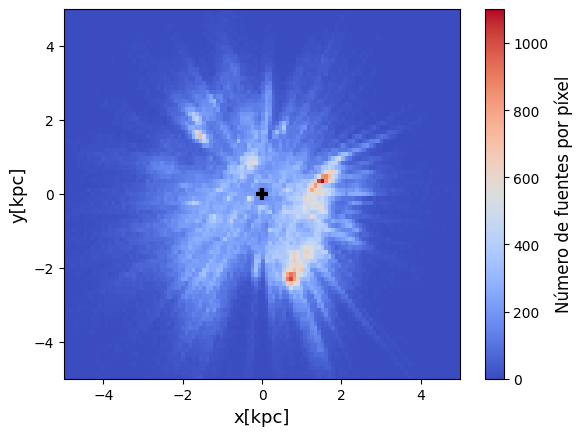

In [ ]:
h, xedges, yedges = np.histogram2d(-df2['x'],df2['y'], bins=400 )
h=(h.T)
plt.imshow(h, interpolation='nearest', origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect="auto",cmap='coolwarm') #,vmin=-1.18,vmax=1.18  #terrain

# plt.grid(which = "both")
# cbar = plt.colorbar(orientation='horizontal', pad=0.1)+
cbar = plt.colorbar()
cbar.set_label('Número de fuentes por píxel', fontsize=12)


plt.ylim(-5,5)
plt.xlim(-5,5)
plt.plot(0,0,'+k',markersize=8, markeredgewidth=3)
plt.xlabel('x[kpc]', fontsize= 13)
plt.ylabel('y[kpc]', fontsize= 13)
plt.show()


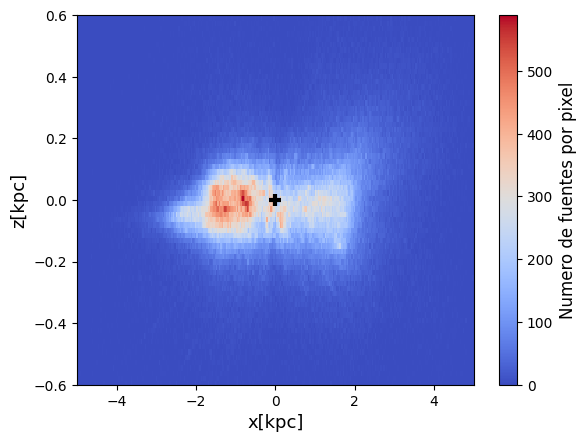

In [ ]:
hz, xedges, yedges = np.histogram2d(df2['x'],df2['z'], bins=1000 )
hz=(hz.T)
plt.imshow(hz, interpolation='nearest', origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect="auto",cmap='coolwarm') #,vmin=-1.18,vmax=1.18  #terrain

cbar1 = plt.colorbar()
cbar1.set_label('Numero de fuentes por pixel', fontsize=12)
plt.ylim(-0.6,0.6)
plt.xlim(-5,5)
plt.plot(0,0,'+k',markersize=8, markeredgewidth=3)
plt.xlabel('x[kpc]', fontsize= 13)
plt.ylabel('z[kpc]', fontsize= 13)
plt.show()